In [1]:
!pip install open-iris

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow
import iris
from typing import Tuple, Union

# Imaginea analizata

## Incarcarea interactiva

Aceasta celula va permite sa incarcati interactiv o imagine de pe discul dvs. Pentru a putea folosi open-iris aveti nevoie de imagini special preluate cu ajutorul camerelor infrarosii, asa cum se gasesc de exemplu in setul de date CASIA, sectiunea interval (https://www.kaggle.com/datasets/swoyam2609/casia-iris-interval)

In [8]:
print("Incarcati o imagine de test")
uploaded_test_image = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_path = list(uploaded_test_image.keys())[0]

Incarcati o imagine de test


Saving S1113L01.jpg to S1113L01.jpg


## Imagine de test

In [2]:
!wget https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_1.png -O ./sample_ir_image.png
uploaded_test_image_path = './sample_ir_image.png'

--2025-04-21 02:29:16--  https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_1.png
Resolving wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data-public.s3.amazonaws.com)... 3.5.25.250, 52.217.223.49, 3.5.20.225, ...
Connecting to wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data-public.s3.amazonaws.com)|3.5.25.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875520 (855K) [image/png]
Saving to: ‘./sample_ir_image.png’

./sample_ir_image.p 100%[===================>] 855.00K  5.15MB/s    in 0.2s    

2025-04-21 02:29:17 (5.15 MB/s) - ‘./sample_ir_image.png’ saved [875520/875520]



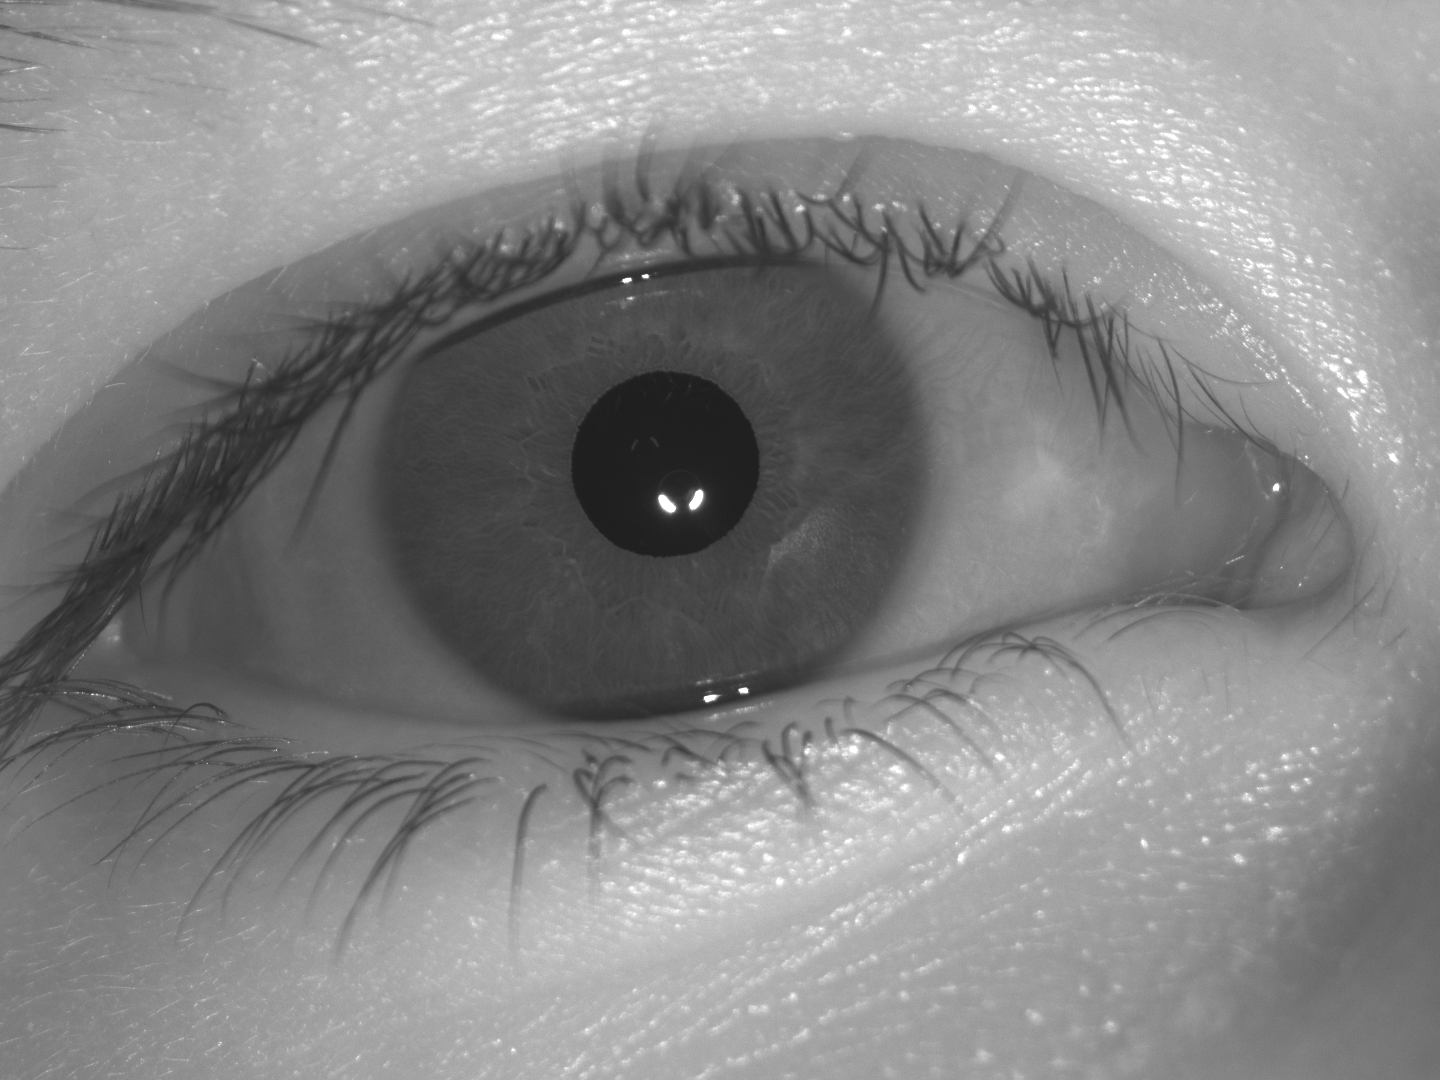

In [3]:
img_pixels = cv2.imread(uploaded_test_image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_pixels)

## Initializarea IRIS

In [4]:
iris_pipeline = iris.IRISPipeline()

## Rularea pipeline-ului

In [5]:
# Options for the `eye_side` argument are: ["left", "right"]
output = iris_pipeline(img_data=img_pixels, eye_side="right")


## Inspectarea rezultatului

Rezultatul este un dictionar care are cheile "error" "iris_teplate" si "metadata". "error" conține informații despre posibilele excepții care ar putea apărea în timpul efectuării inferenței.

Dacă valoarea output["error"] este None, înseamnă că IRISPipeline a terminat apelul de inferență fără a ridica vreo excepție. Dacă IRISPipeline a ridicat o excepție în timpul efectuării inferenței, valoarea output["error"] va fi un dicționar care conține trei chei: ["error_type", "message", "traceback"].

In [6]:
output.keys()

dict_keys(['error', 'iris_template', 'metadata'])

Valoarea iris_template conține codul iris generat de IRISPipeline pentru o textură de iris vizibilă în imaginea de intrare. Valoarea output["iris_template"] este un obiect IrisTemplate care conține două câmpuri: ["iris_codes: List[np.ndarray]", "mask_codes: List[np.ndarray]"].

Fiecare cod disponibil în obiectul output["iris_template"] este un numpy.ndarray cu forma (16, 256, 2). Lungimea array-urilor care conțin coduri iris și coduri mască este determinată de parametrii băncii de filtre ai IRISPipeline. Dimensiunile formei codurilor iris/mască corespund următoarelor (iris_code_height, iris_code_width, 2). Valorile iris_code_height și iris_code_width sunt determinate de definiția ProbeSchema pentru obiectul ConvFilterBank, iar numărul de filtre (num_filters) este determinat de numărul de filtre specificat pentru obiectul ConvFilterBank. Ultimele două valori ale dimensiunii codului iris/mască corespund părților reale și imaginare ale fiecărui răspuns complex al filtrului.

In [7]:
"""Available fields in `output["iris_template"]` are: """ + str(output["iris_template"].__fields__)

'Available fields in `output["iris_template"]` are: {\'iris_codes\': ModelField(name=\'iris_codes\', type=List[ndarray], required=True), \'mask_codes\': ModelField(name=\'mask_codes\', type=List[ndarray], required=True), \'iris_code_version\': ModelField(name=\'iris_code_version\', type=str, required=True)}'

## Vizualizarea rezultatelor

In [8]:
iris_visualizer = iris.visualisation.IRISVisualizer()

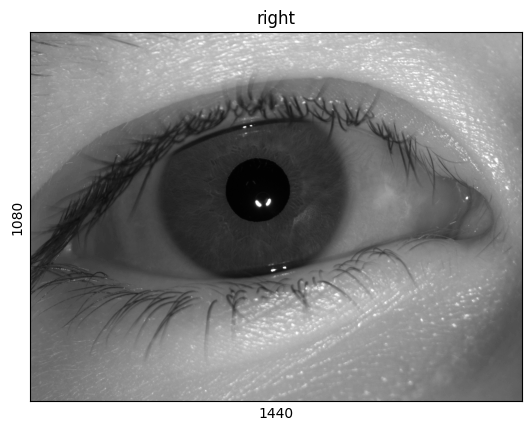

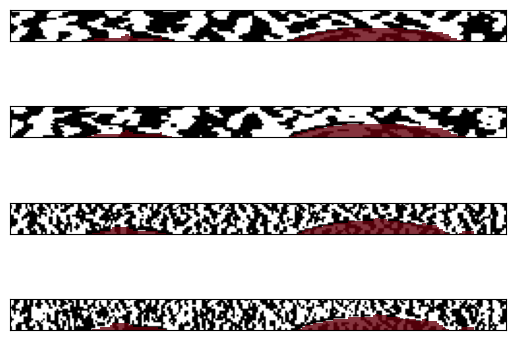

In [9]:
import matplotlib.pyplot as plt

canvas = iris_visualizer.plot_ir_image(iris.IRImage(img_data=img_pixels, eye_side="right"))
plt.show()

canvas = iris_visualizer.plot_iris_template(output["iris_template"])
plt.show()

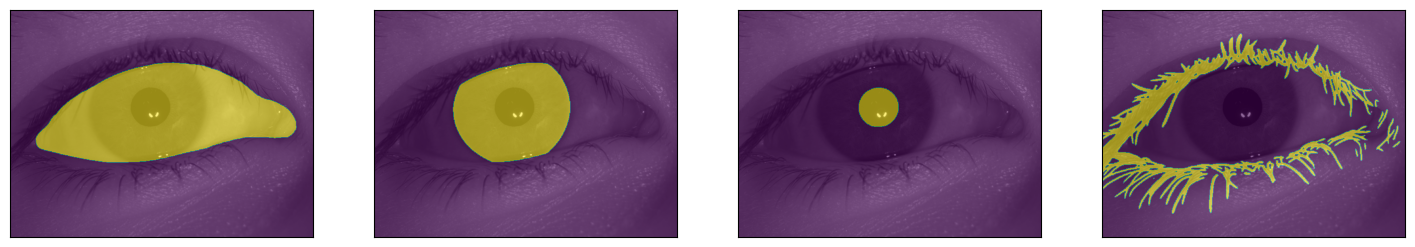

In [10]:
canvas = iris_visualizer.plot_segmentation_map(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    segmap=iris_pipeline.call_trace['segmentation'],
)
plt.show()

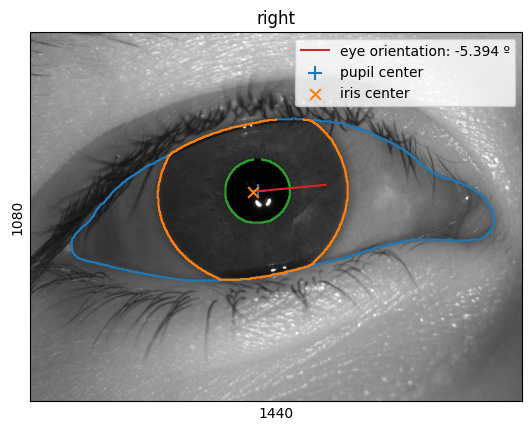

In [11]:
canvas = iris_visualizer.plot_all_geometry(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    geometry_polygons=iris_pipeline.call_trace['vectorization'],
    eye_orientation=iris_pipeline.call_trace['eye_orientation'],
    eye_center=iris_pipeline.call_trace['eye_center_estimation'],
)
plt.show()

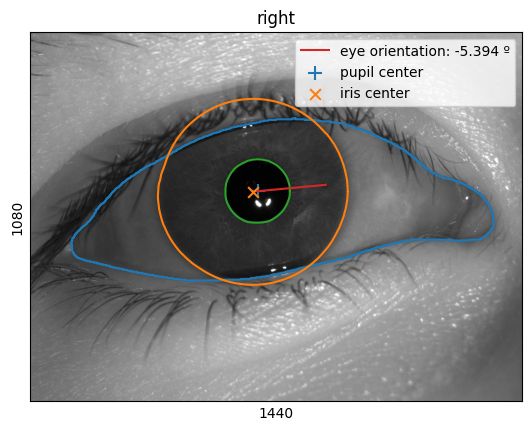

In [12]:
canvas = iris_visualizer.plot_all_geometry(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    geometry_polygons=iris_pipeline.call_trace['geometry_estimation'],
    eye_orientation=iris_pipeline.call_trace['eye_orientation'],
    eye_center=iris_pipeline.call_trace['eye_center_estimation'],
)
plt.show()

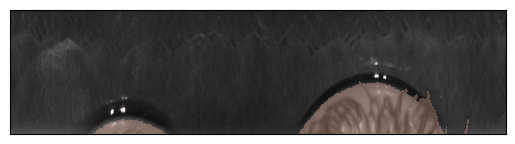

In [13]:
canvas = iris_visualizer.plot_normalized_iris(
    normalized_iris=iris_pipeline.call_trace['normalization'],
)
plt.show()

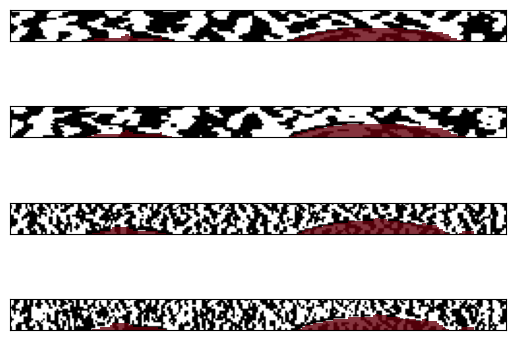

In [46]:
canvas = iris_visualizer.plot_iris_template(
    iris_template=iris_pipeline.call_trace['encoder'],
)
plt.show()